In [ ]:
from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt

# 그래프 데이터 
csv_path = "./data/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['High']

plt.style.use('default')

# 축 그리기 및 좌표축 설정
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1500,2400])
plt.xlim(['2019-05-01', '2020-03-01'])

# 날짜 정보를 python datetime 자료형으로 변환
min_date = price.idxmin().to_pydatetime()
max_date = price.idxmax().to_pydatetime()
min_price = price.min()
max_price = price.max()

# 주석달기
ax.annotate(f"peak: ${max_price:.2f}\n{max_date:%Y-%m-%d}", 
            xy=(max_date, price.asof(max_date)+10), 
            xytext=(max_date, price.asof(max_date)+100), 
            color='red', fontsize=9,
            ha='center',
            arrowprops=dict(arrowstyle='fancy',facecolor='red', edgecolor='red'))

ax.annotate(f"low: ${min_price:.2f}\n{min_date:%Y-%m-%d}", 
            xy=(min_date, price.asof(min_date)-10), 
            xytext=(min_date, price.asof(min_date)-100), 
            color='red', fontsize=9,
            ha='center', va='top',
            arrowprops=dict(arrowstyle='fancy',facecolor='red', edgecolor='red'))


# 그리드, 타이틀 달기
plt.grid()
ax.set_title('AMZN Daily High Price Trend')

# 보여주기
plt.show()

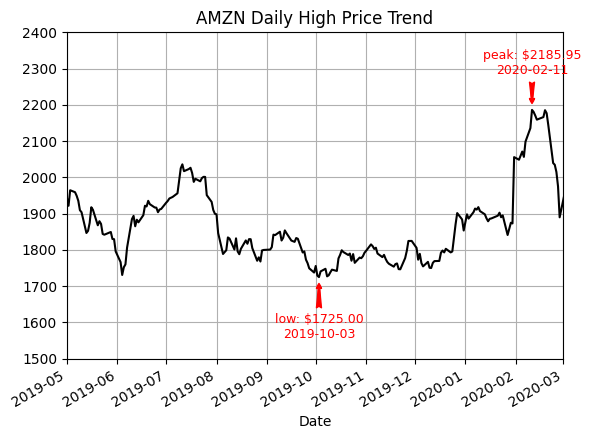